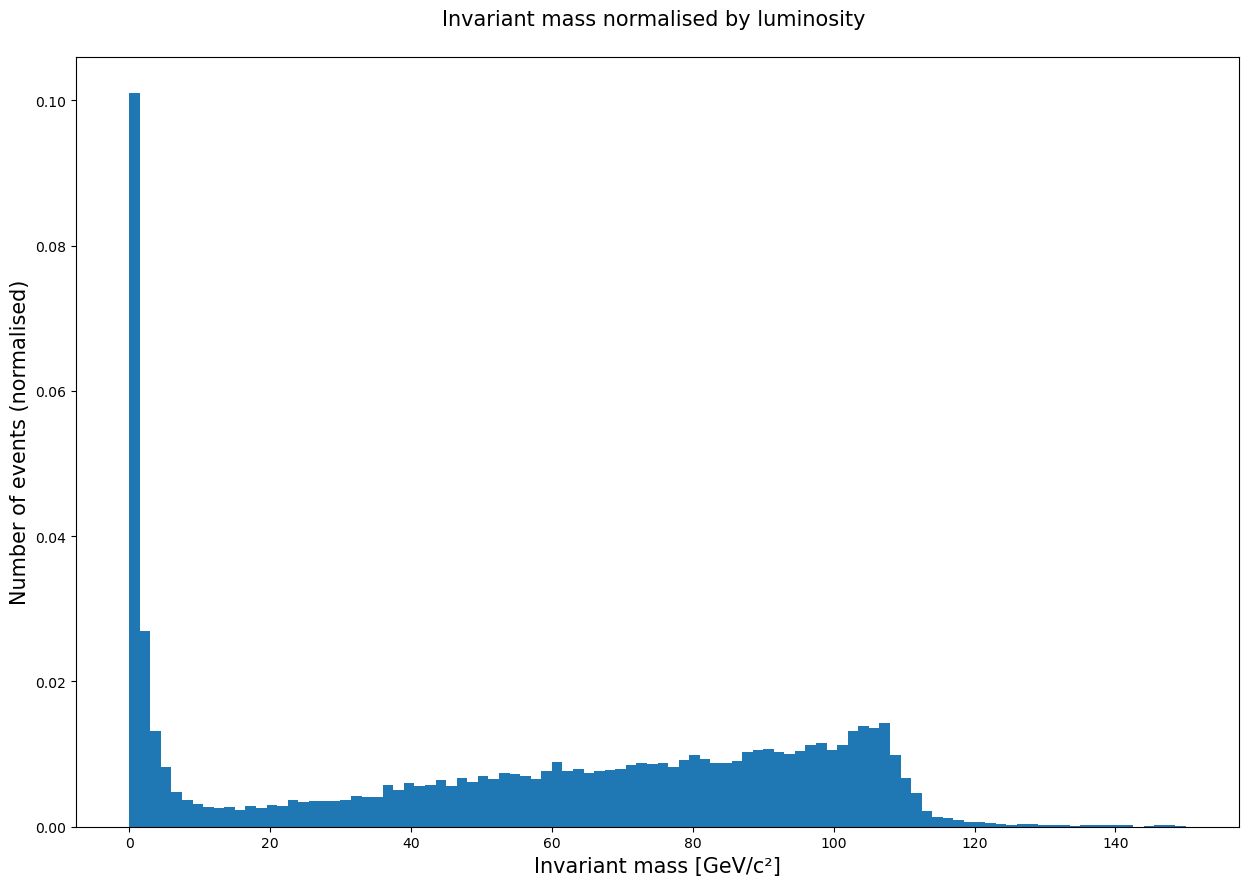

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

dataset91 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short91_f1_000.csv.gz',index_col=False)
dataset92 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short92_e2_000.csv.gz',index_col=False)
dataset93 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short93_d2_000.csv.gz',index_col=False)
dataset94 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short94_c2_000.csv.gz',index_col=False)

dataset = pd.concat([dataset91, dataset92, dataset93, dataset94])

#since invariant mass isn't calculated let's do it here:
dataset["ETA1"] = - np.log(np.tan(dataset.THETA1/2))
dataset["ETA2"] = - np.log(np.tan(dataset.THETA2/2))
dataset["M"] = np.sqrt(2*dataset.PT1*dataset.PT2*(np.cosh(dataset.ETA1 - dataset.ETA2) - np.cos(dataset.PHI1 - dataset.PHI2)))

#not weighted by luminosity
fig = plt.figure(figsize=(15, 10))
plt.hist(dataset.M, bins=100, range=(0,150), density = True)

plt.xlabel('Invariant mass [GeV/c²]', fontsize=15)
plt.ylabel('Number of events (normalised)', fontsize=15)
plt.title('Invariant mass normalised by luminosity \n', fontsize=15) 

plt.show()

The values and the uncertainties from the optimization:

The value of the decay width = 41.69871475296 +- 12.038047060442427
The value of the maximum of the distribution = 105.46372349778993 +- 2.21181652609509
a = -0.0013140033864061514 +- 0.0005580360456378888
b = 0.08900629516661833 +- 0.018656182164021696
A = 4.752274082334646 +- 3.772268696869954


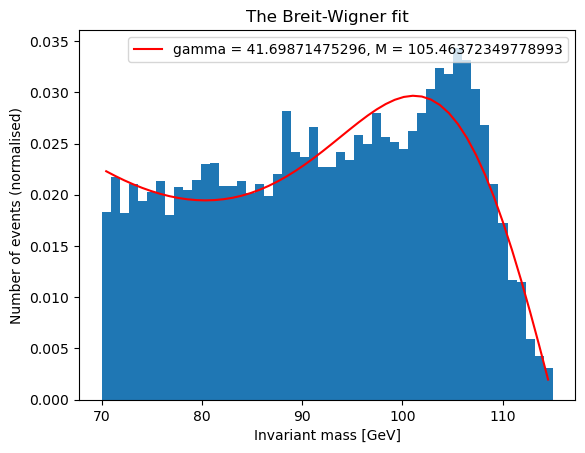

In [2]:
#limit to where Z-boson should be:
lowerlimit = 70
upperlimit = 115
bins = 50

#Histogram of that area
limitedmasses = dataset[(dataset.M > lowerlimit) & (dataset.M < upperlimit)]
histogram = plt.hist(limitedmasses.M, bins=bins, range=(lowerlimit,upperlimit), density = True)


def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

#Initial guesses:
initials = [40, 100, 4, 2, 4]

#use the histogram to make a function:
y = histogram[0]
x = 0.5*(histogram[1][0:-1] + histogram[1][1:])
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
    
#Values from optimization:
print("The values and the uncertainties from the optimization:")
print("")
print("The value of the decay width = {} +- {}".format(best[0], error[0]))
print("The value of the maximum of the distribution = {} +- {}".format(best[1], error[1]))
print("a = {} +- {}".format(best[2], error[2]))
print("b = {} +- {}".format(best[3], error[3]))
print("A = {} +- {}".format(best[4], error[4]))


#plot graph:
plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events (normalised)')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()

This is too inaccurate to get results. Let's remove big pseudorapidities and try again:

9575
4336
The values and the uncertainties from the optimization:

The value of the decay width = 41.69185938495 +- 12.040510573013002
The value of the maximum of the distribution = 105.46240709563861 +- 2.212339276801231
a = -0.0013136734714473707 +- 0.000558235164039506
b = 0.08899558069797864 +- 0.01866151571720492
A = 4.75007673621945 +- 3.7738494122825292


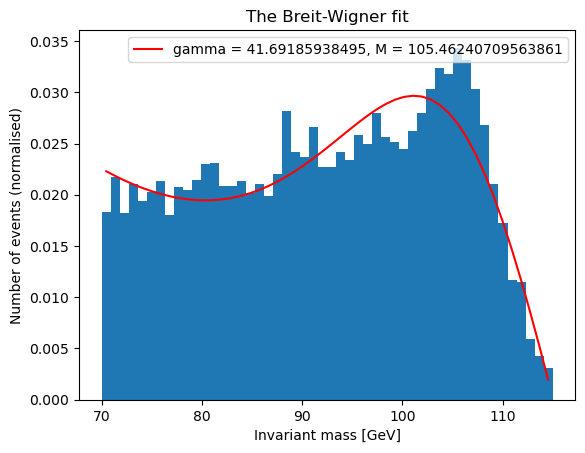

In [3]:
pseudorapidity_limit = 0.5
print(len(limitedmasses))
limited_pseudorapidies = limitedmasses[(abs(limitedmasses.ETA1) < 0.05) & (abs(limitedmasses.ETA2) < 0.05)]
print(len(limited_pseudorapidies))
histogram = plt.hist(limitedmasses.M, bins=bins, range=(lowerlimit,upperlimit), density = True)


def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

#Initial guesses:
initials = [1.5, 100, 0, 2, 100]

#use the histogram to make a function:
y = histogram[0]
x = 0.5*(histogram[1][0:-1] + histogram[1][1:])
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
    
#Values from optimization:
print("The values and the uncertainties from the optimization:")
print("")
print("The value of the decay width = {} +- {}".format(best[0], error[0]))
print("The value of the maximum of the distribution = {} +- {}".format(best[1], error[1]))
print("a = {} +- {}".format(best[2], error[2]))
print("b = {} +- {}".format(best[3], error[3]))
print("A = {} +- {}".format(best[4], error[4]))


#plot graph:
plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events (normalised)')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()